In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
import pandas as pd
df = pd.read_csv(r"C:/Users/shikh/OneDrive/Desktop/Restaurant rating/Data/Dataset.csv")
print(df.shape)
print(df.columns)
df.head()


(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


MAE: 0.20718401771966463
MSE: 0.0993073102006081
RMSE: 0.3151306240285258
R² Score: 0.9566349721409141


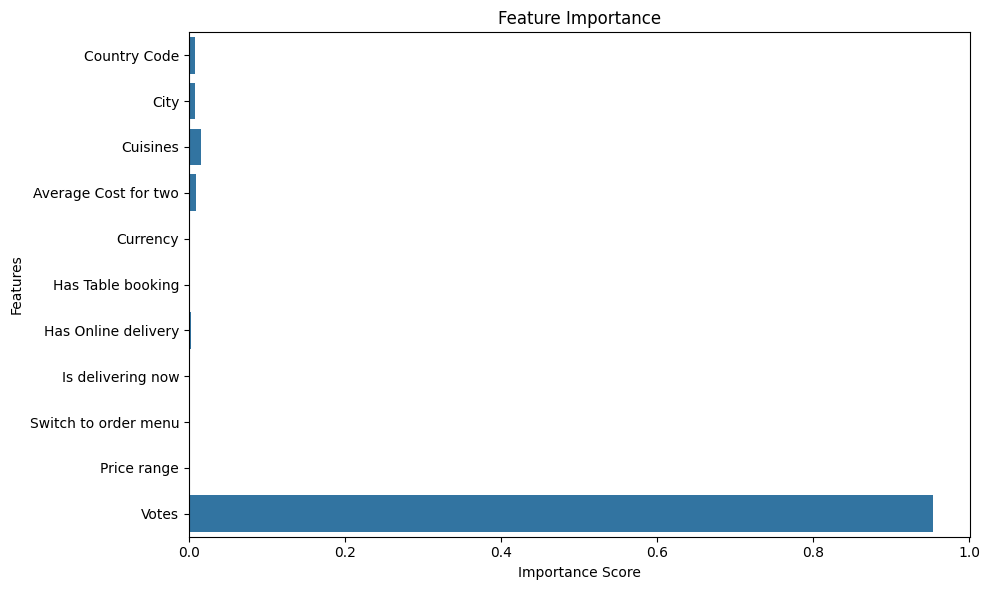

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the CSV file
df = pd.read_csv(r"C:/Users/shikh/OneDrive/Desktop/Restaurant rating/Data/Dataset.csv")

# Drop unhelpful columns
df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
         'Longitude', 'Latitude', 'Rating color', 'Rating text'], axis=1, inplace=True)

# Drop rows with missing target value
df = df[df['Aggregate rating'].notnull()]

# Drop rows with missing categorical values (optional: or fillna if needed)
df = df[df['Cuisines'].notnull()]
df = df[df['City'].notnull()]

# Label encode categorical features
label_cols = ['City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
              'Is delivering now', 'Switch to order menu']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Define features (X) and target (y)
X = df.drop(['Aggregate rating'], axis=1)
y = df['Aggregate rating']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()



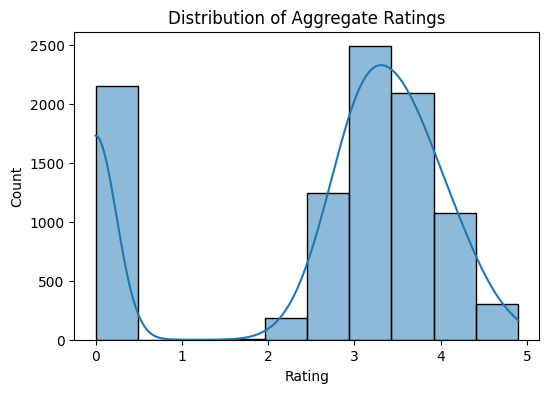

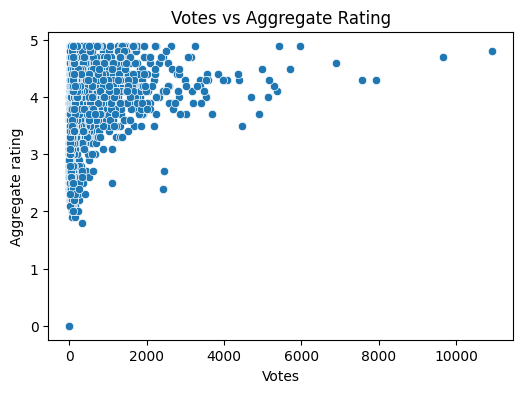

In [11]:
# Ratings distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Votes vs Rating
plt.figure(figsize=(6,4))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Votes vs Aggregate Rating')
plt.show()


In [12]:
import joblib
joblib.dump(model, 'restaurant_rating_model.pkl')


['restaurant_rating_model.pkl']

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv("C:/Users/shikh/OneDrive/Desktop/Restaurant rating/Data/Dataset.csv")

# Drop unnecessary columns
drop_cols = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
             'Longitude', 'Latitude', 'Rating color', 'Rating text']
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# Drop rows with missing target or important categorical values
df.dropna(subset=['Aggregate rating', 'City', 'Cuisines'], inplace=True)

# Encode categorical features
categorical_cols = ['City', 'Cuisines', 'Currency', 'Has Table booking',
                    'Has Online delivery', 'Is delivering now', 'Switch to order menu']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Features and target
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Evaluate
print("\nLinear Regression:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R2 Score:", r2_score(y_test, lr_preds))

print("\nDecision Tree Regressor:")
print("MAE:", mean_absolute_error(y_test, dt_preds))
print("MSE:", mean_squared_error(y_test, dt_preds))
print("R2 Score:", r2_score(y_test, dt_preds))

# Feature importances from Decision Tree
importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop Features influencing restaurant ratings:")
print(importances)



Linear Regression:
MAE: 1.0181242644668214
MSE: 1.5242079356060187
R2 Score: 0.3344163742117936

Decision Tree Regressor:
MAE: 0.26650951632617426
MSE: 0.17381933531226354
R2 Score: 0.9240974274397581

Top Features influencing restaurant ratings:
Votes                   0.953702
Cuisines                0.015813
Average Cost for two    0.010101
Country Code            0.007684
City                    0.006313
Has Online delivery     0.002244
Currency                0.001879
Price range             0.001171
Has Table booking       0.001031
Is delivering now       0.000062
Switch to order menu    0.000000
dtype: float64


In [14]:
import pandas as pd

df = pd.read_csv("C:/Users/shikh/OneDrive/Desktop/Restaurant rating/Data/Dataset.csv")
print(df.head())  # Check the first few rows
print(df.info())  # Overview of data types and missing values


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [15]:
drop_cols = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
             'Longitude', 'Latitude', 'Rating color', 'Rating text']
df.drop(columns=drop_cols, inplace=True, errors='ignore')


In [16]:
df.dropna(subset=['Aggregate rating', 'City', 'Cuisines'], inplace=True)
print(df.isnull().sum())  # Confirm no missing in critical columns


Country Code            0
City                    0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['City', 'Cuisines', 'Currency', 'Has Table booking',
                    'Has Online delivery', 'Is delivering now', 'Switch to order menu']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [18]:
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [20]:
## linear regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)


In [21]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate(y_test, lr_preds, "Linear Regression")
evaluate(y_test, dt_preds, "Decision Tree Regressor")



Linear Regression Performance:
MAE: 1.0181242644668214
MSE: 1.5242079356060187
R2 Score: 0.3344163742117936

Decision Tree Regressor Performance:
MAE: 0.26650951632617426
MSE: 0.17381933531226354
R2 Score: 0.9240974274397581


In [23]:
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("\nTop Features Influencing Restaurant Ratings:")
print(importances)



Top Features Influencing Restaurant Ratings:
Votes                   0.953702
Cuisines                0.015813
Average Cost for two    0.010101
Country Code            0.007684
City                    0.006313
Has Online delivery     0.002244
Currency                0.001879
Price range             0.001171
Has Table booking       0.001031
Is delivering now       0.000062
Switch to order menu    0.000000
dtype: float64


In [24]:
pip install wandb


   ---------------------------------------- 0.0/20.8 MB ? eta -:--:--
   ------- -------------------------------- 3.7/20.8 MB 24.2 MB/s eta 0:00:01
   --------- ------------------------------ 4.7/20.8 MB 12.4 MB/s eta 0:00:02
   ----------- ---------------------------- 5.8/20.8 MB 9.0 MB/s eta 0:00:02
   ------------- -------------------------- 6.8/20.8 MB 8.4 MB/s eta 0:00:02
   --------------- ------------------------ 7.9/20.8 MB 7.6 MB/s eta 0:00:02
   ---------------- ----------------------- 8.4/20.8 MB 6.9 MB/s eta 0:00:02
   ----------------- ---------------------- 8.9/20.8 MB 5.9 MB/s eta 0:00:02
   ----------------- ---------------------- 9.2/20.8 MB 5.6 MB/s eta 0:00:03
   ------------------- -------------------- 10.0/20.8 MB 5.2 MB/s eta 0:00:03
   -------------------- ------------------- 10.7/20.8 MB 5.0 MB/s eta 0:00:02
   ---------------------- ----------------- 11.5/20.8 MB 4.9 MB/s eta 0:00:02
   ----------------------- ---------------- 12.3/20.8 MB 4.8 MB/s eta 0:00:02



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import wandb
wandb.login()


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\shikh\_netrc
wandb: Currently logged in as: shin5704chan (shin5704chan-manipal-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [3]:
wandb.init(
    project="restaurant-rating-prediction",  # Your project name
    name="linear-vs-decision-tree",          # Optional run name
    config={
        "model_1": "Linear Regression",
        "model_2": "Decision Tree Regressor",
        "test_size": 0.2,
        "random_state": 42
    }
)


In [5]:
import pandas as pd
import numpy as np
import wandb

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ✅ 1. Initialize wandb
wandb.login()
wandb.init(
    project="restaurant-rating-prediction",
    name="linear-vs-decision-tree",
    config={
        "test_size": 0.2,
        "random_state": 42,
        "models": ["Linear Regression", "Decision Tree Regressor"]
    }
)

# ✅ 2. Load and prepare data
df = pd.read_csv("C:/Users/shikh/OneDrive/Desktop/Restaurant rating/Data/Dataset.csv")

drop_cols = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
             'Longitude', 'Latitude', 'Rating color', 'Rating text']
df.drop(columns=drop_cols, inplace=True, errors='ignore')
df.dropna(subset=['Aggregate rating', 'City', 'Cuisines'], inplace=True)

categorical_cols = ['City', 'Cuisines', 'Currency', 'Has Table booking',
                    'Has Online delivery', 'Is delivering now', 'Switch to order menu']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=wandb.config.test_size, random_state=wandb.config.random_state)

# ✅ 3. Train and evaluate Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

wandb.log({
    "Linear Regression MAE": mean_absolute_error(y_test, lr_preds),
    "Linear Regression MSE": mean_squared_error(y_test, lr_preds),
    "Linear Regression R2": r2_score(y_test, lr_preds)
})

# ✅ 4. Train and evaluate Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=wandb.config.random_state)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

wandb.log({
    "Decision Tree MAE": mean_absolute_error(y_test, dt_preds),
    "Decision Tree MSE": mean_squared_error(y_test, dt_preds),
    "Decision Tree R2": r2_score(y_test, dt_preds)
})

# ✅ 5. Log feature importances from Decision Tree
importances = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

for feature, importance in importances.items():
    wandb.log({f"Feature Importance: {feature}": importance})

# ✅ 6. Finish wandb run
wandb.finish()

# Optional: Print results locally as well
print("\nTop Features Influencing Restaurant Ratings:")
print(importances)


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


Decision Tree MAE,▁
Decision Tree MSE,▁
Decision Tree R2,▁
Feature Importance: Average Cost for two,▁
Feature Importance: City,▁
Feature Importance: Country Code,▁
Feature Importance: Cuisines,▁
Feature Importance: Currency,▁
Feature Importance: Has Online delivery,▁
Feature Importance: Has Table booking,▁
Feature Importance: Is delivering now,▁



Top Features Influencing Restaurant Ratings:
Votes                   0.953702
Cuisines                0.015813
Average Cost for two    0.010101
Country Code            0.007684
City                    0.006313
Has Online delivery     0.002244
Currency                0.001879
Price range             0.001171
Has Table booking       0.001031
Is delivering now       0.000062
Switch to order menu    0.000000
dtype: float64
